# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [6]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

$$\frac{dS}{dt} = \gamma I -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$


* 2
* One equation describes the flow from susceptible to infections and the other describes the flow from infectious to susceptible
* $\beta$ and $\gamma$ describe the spreadability and recovery rate of the disease, respectively. If a disease has a big $\gamma$, then recovery from the disease is fast, and vice versa. Same with big and small $\beta$ - is it really infectious in each period, or not very.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

1. 


1.1. About 80%

1.2. About 17.5%

1.2. About 60%

2. When sampling random nodes, each node is sampled with the same probability. When sampling neighbours, the more connected nodes are sampled with higher probability (as they are neighbours more often).


3. The BA network has preferential rather than random attachment as in the ER network. This results in higher variance in the degree distribution. The higher the variance in the degree distribution, the higher the benefit from sampling from neighbours. E.g. if everyone had the same node degree, sampling from neighbours and random sampling would be the same.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

Explorable 1 details how herd immunity arises from a sufficient amount of people being vaccinated, using a SIS model. Even though everyone isn't vaccinated, enough people being vaccinated eradicates the virus, i.e. if the virus starts in one person with 4 neighbours who are all vaccinated, the person eventually becomes resistant and the virus is gone. This is shown for different types of networks.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [7]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

In [8]:
# import numpy because numpy is used for random number generation
import numpy as np

# set probability of infecting a neighbour in each iteration
p_I = 0.1

# set amount of iterations
n_iter = 200

# create set of all infected (empty)
I = set()

# create set of all healthy (everyone)
S = set(G.nodes())

# choose a random unlucky soul to be patient 0
patient0 = np.random.choice(list(S))

# add the unlucky soul to the infected
I.add(patient0)

# and remove him from the healthy
S.remove(patient0)

# for each iteration
for t in range(n_iter):
    
    # for each infected person
    for infected_node in list(I):
        
        # get neighbours of infected person
        neighbors = G.neighbors(infected_node)
        
        # infect each neighbour with probability p_I
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        
        # take union of I and infected neighbour and create new set of infected
        I |= infected_neighbors
        
        # remove infected neighbours from healthy people
        S -= infected_neighbors

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [9]:
import pandas as pd

data = pd.read_csv(
    "facebook-wall.txt.anon",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

# Count the number of times each link occurs and store that in a new 'weight' column
data = data.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.Graph` from this dataframe
G = nx.from_pandas_edgelist(data, 'user1', 'user2', 'weight', create_using=nx.Graph)

In [14]:
# create lists for logs
R_list, S_list, I_list = [], [], []

# set probability of infecting a neighbour in each iteration
p_I = 0.25

# set propability of becoming resistant
p_R = 0.1

# set probablity of becoming susceptible
p_S = 0.3

# set amount of iterations
n_iter = 200

# create set of all infected (empty)
I = set()

# create set of all resistant (empty)
R = set()

# create set of all healthy (everyone)
S = set(G.nodes())

# choose a random unlucky soul to be patient 0
patient0 = np.random.choice(list(S))

# add the unlucky soul to the infected
I.add(patient0)

# and remove him from the healthy
S.remove(patient0)

# for each iteration
for t in range(n_iter):
    
    # for each infected person
    for infected_node in list(I):
        
        # get neighbours of infected person
        neighbors = G.neighbors(infected_node)
        
        # resistant neighbours can't be infected
        non_resistant_neighbors = set(neighbors) - R
        
        # infect each neighbour with probability p_I
        infected_neighbors = set([n for n in non_resistant_neighbors if np.random.random() < p_I])
        
        
        # take union of I and infected neighbour and create new set of infected
        I |= infected_neighbors 
        
        # remove infected neighbours from healthy people
        S -= infected_neighbors
    
    # people becoming resitant
    resistant_people = set([n for n in I if np.random.random() < p_R])
    
    # reallocate people
    R |= resistant_people
    I -= resistant_people 
    
    # people becoming susceptible
    susceptible_people = set([n for n in R if np.random.random() < p_S])
    
    # reallocate people
    S |= susceptible_people
    R -= susceptible_people 
    
    # keep logs 
    R_list.append(len(R)/len(G))
    S_list.append(len(S)/len(G))
    I_list.append(len(I)/len(G))

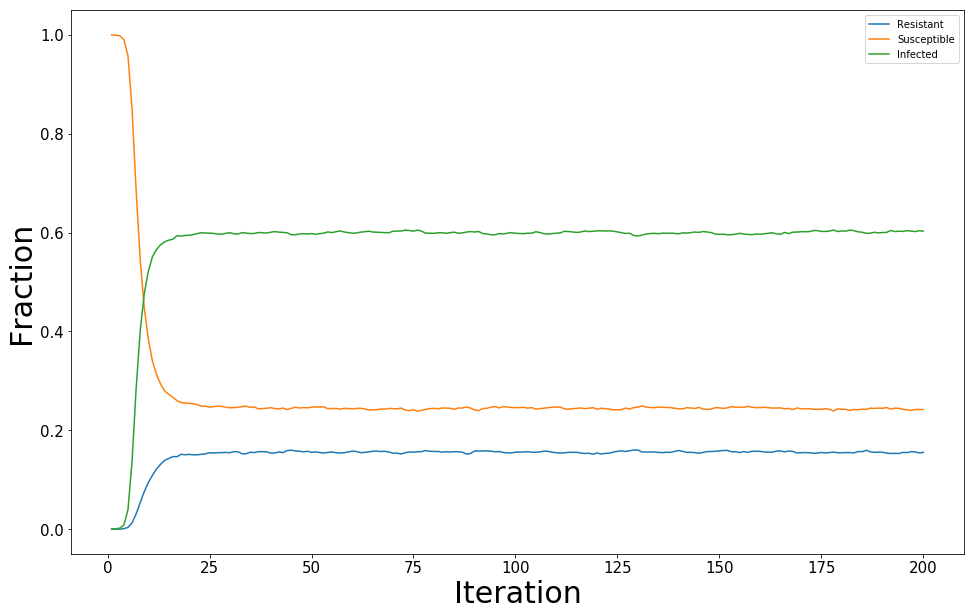

In [15]:
# create a figure

fig = plt.figure(figsize=(16,10))
ax = plt.axes()

num_list = range(1,n_iter+1)

ax.plot(num_list, R_list, label='Resistant')
ax.plot(num_list, S_list, label='Susceptible')
ax.plot(num_list, I_list, label='Infected')
plt.xlabel('Iteration',fontsize=30) # large text this time
plt.xticks(fontsize=15) # large text this time
plt.ylabel('Fraction',fontsize=30) # large text this time
plt.yticks(fontsize=15) # large text this time
plt.legend()
plt.show()

Well, it doesn't look good for the people in Magnustown! 

Remarkably fast stabilization at an equilibrium for the given parameters, and a lot of infected people.

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.